In [33]:
#Import necessary package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### About Dataset<br>
<h3>Dataset Information</h3><br>
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>

<h3>Content</h3><br>
<b>There are 25 variables:</b><br>

<b>ID:</b> ID of each client<br>
<b>LIMIT_BAL:</b> Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
<b>SEX:</b> Gender (1=male, 2=female)<br>
<b>EDUCATION:</b> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
<b>MARRIAGE:</b> Marital status (1=married, 2=single, 3=others)<br>
<b>AGE:</b> Age in years<br>
<b>PAY_0:</b> Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
<b>PAY_2:</b> Repayment status in August, 2005 (scale same as above)<br>
<b>PAY_3:</b> Repayment status in July, 2005 (scale same as above)<br>
<b>PAY_4:</b>Repayment status in June, 2005 (scale same as above)<br>
<b>PAY_5:</b> Repayment status in May, 2005 (scale same as above)<br>
<b>PAY_6:</b> Repayment status in April, 2005 (scale same as above)<br>
<b>BILL_AMT1:</b> Amount of bill statement in September, 2005 (NT dollar)<br>
<b>BILL_AMT2:</b> Amount of bill statement in August, 2005 (NT dollar)<br>
<b>BILL_AMT3:</b> Amount of bill statement in July, 2005 (NT dollar)<br>
<b>BILL_AMT4:</b> Amount of bill statement in June, 2005 (NT dollar)<br>
<b>BILL_AMT5:</b> Amount of bill statement in May, 2005 (NT dollar)<br>
<b>BILL_AMT6:</b> Amount of bill statement in April, 2005 (NT dollar)<br>
<b>PAY_AMT1:</b> Amount of previous payment in September, 2005 (NT dollar)<br>
<b>PAY_AMT2:</b> Amount of previous payment in August, 2005 (NT dollar)<br>
<b>PAY_AMT3:</b> Amount of previous payment in July, 2005 (NT dollar)<br>
<b>PAY_AMT4:</b> Amount of previous payment in June, 2005 (NT dollar)<br>
<b>PAY_AMT5:</b> Amount of previous payment in May, 2005 (NT dollar)<br>
<b>PAY_AMT6:</b> Amount of previous payment in April, 2005 (NT dollar)<br>
<b>default.payment.next.month:</b> Default payment (1=yes, 0=no)<br>
Inspiration<br>
<h3>Some ideas for exploration:</h3> <br>

How does the probability of default payment vary by categories of different demographic variables?<br>
Which variables are the strongest predictors of default payment?<br>
<h3>Acknowledgements</h3><br>
Any publications based on this dataset should acknowledge the following:<br>

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.<br>

The original dataset can be found here at the UCI Machine Learning Repository.<br>

In [34]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
df.shape

(30000, 25)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### preprocessing

In [38]:
# Select x and y

x = df.iloc[:, 1:24]

In [39]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [40]:
y = df.iloc[:, 24]

In [41]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [42]:
# Standarized the x variable 

from sklearn.preprocessing import StandardScaler

In [43]:
scale = StandardScaler()

In [44]:
X = scale.fit_transform(x)

In [45]:
# split data
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 124, test_size = .23)

In [47]:
x_train.shape

(23100, 23)

In [48]:
y_train.shape

(23100,)

### Train model (SVM)

In [49]:
# svm with kernel linear
from sklearn.svm import SVC

In [50]:
model_linear = SVC(gamma = "auto", kernel = "linear")

In [51]:
model_linear.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [52]:
predict_linear = model_linear.predict(x_test)

In [53]:
# svm with kernel polynomial 
model_poly = SVC(gamma = "auto", kernel = "poly")

In [54]:
model_poly.fit(x_train, y_train)

SVC(gamma='auto', kernel='poly')

In [55]:
predict_poly = model_poly.predict(x_test)

In [56]:
#svm with kernel RBF
model_rbf = SVC(gamma = "auto")

In [57]:
model_rbf.fit(x_train, y_train)

SVC(gamma='auto')

In [58]:
predict_rbf = model_rbf.predict(x_test)

In [59]:
#svm with kernel sigmoid

In [60]:
model_sigmoid = SVC(gamma = "auto", kernel = "sigmoid")

In [61]:
model_sigmoid.fit(x_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [62]:
predict_sigmoid = model_sigmoid.predict(x_test)

### Evaluation 

In [63]:
accuracy = {"Kernel" : ["Linear", "Polynomial", "RBF", "Sigmoid"], \
            "Accuracy": [model_linear.score(x_test, y_test),  model_poly.score(x_test, y_test), model_rbf.score(x_test, y_test),\
                         model_sigmoid.score(x_test, y_test)]}

In [65]:
df_accuracy = pd.DataFrame(accuracy)

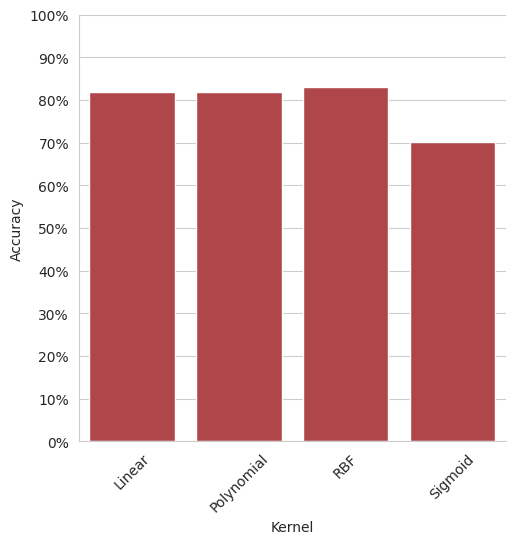

In [90]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")
g = sns.catplot(x = "Kernel", y= "Accuracy", data = accuracy, kind = "bar")
plt.xticks(rotation = 45)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0%","10%","20%", "30%","40%","50%","60%","70%","80%","90%","100%"])
#for ax in g.axes.flat:
    #for p in ax.patches:
        #ax.text(p.get_x() + p.get_width() / 2.,
                #p.get_height(),
                #'{:1.2f}'.format(p.get_height()),
                #fontsize=10, color='black',
                #ha='center',
                #va='bottom')

plt.show()

<b> We see that for SVM classification RBF kernel accouracy about 83% ...</b>

In [93]:
# Cofusion Matrix for RBF 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_rbf)

In [94]:
cm

array([[5229,  212],
       [ 965,  494]])

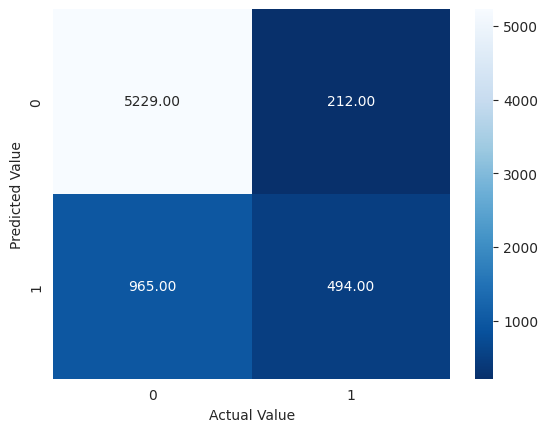

In [97]:
# plot confusion matrix

sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "Blues_r")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [98]:
#Confusion matrix for polynomial
cm_poly = confusion_matrix(y_test, predict_poly)

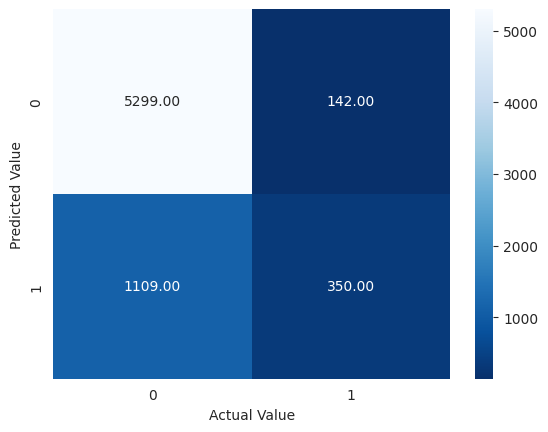

In [100]:
sns.heatmap(cm_poly, annot = True, fmt = ".2f", cmap = "Blues_r")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

<b> From confusion matrix RBF cernal also get the best accuracy </b>